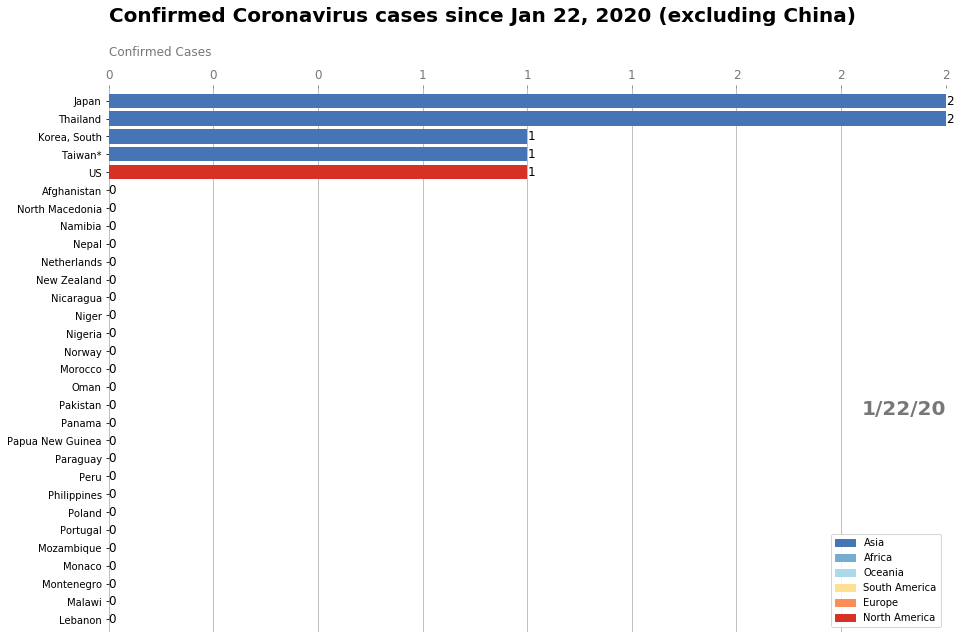

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
#animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start, end), fargs=[death, False])
animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start, end), interval = 400)
#HTML(animator.to_jshtml())
#HTML(animator.to_html5_video())

animator.save('covid19.mp4', writer='ffmpeg')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#continents for color coding the countries
cpath = 'csse_covid_19_data\\csse_covid_19_time_series\\country_continent.csv'
countries =  pd.read_csv(cpath)

In [3]:
path = 'csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_'
files = ['confirmed', 'deaths']
suffix = '_global.csv'

conf = pd.read_csv(path + files[0] + suffix)#, usecols=[0,1,2,5,6])
conf = conf.drop(columns=['Lat','Long'])
conf.rename(columns = {'Province/State':'state'}, inplace = True) 
conf.rename(columns = {'Country/Region':'country'}, inplace = True) 
conf.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
1,NaN,Albania,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19


In [4]:
dateformat = '%m/%d/%y'
start = conf.columns[2] 
start = datetime.strptime(start,dateformat)

end = conf.columns[len(conf.columns)-1]
end = datetime.strptime(end,dateformat)

print(start,end)

#to match column names
dateformat = '%#m/%#d/%y'

2020-01-22 00:00:00 2020-04-16 00:00:00


In [5]:
colors = dict(zip(
    #["Europe", "South America", "Asia", "Oceania", "North America", "Africa"],
    #["Oceania", "North America", "Africa", "Europe", "South America", "Asia"],
    #["#abd9e9", "#d73027", "#74add1", "#fc8d59", "#fee090", "#4575b4"]
    ["Asia","Africa","Oceania","South America","Europe","North America"],
["#4575b4","#74add1","#abd9e9","#fee090","#fc8d59","#d73027"]
))
continent = countries.set_index('country')['continent'].to_dict()

In [6]:
def draw_barchart(date, data=conf, excludeChina = True):
    #dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    current_date = date.strftime(dateformat)
    #print(current_date)
    df = data.groupby('country', as_index=False).sum().sort_values(by=current_date, ascending = False).nlargest(31,current_date)
    #.tail(30)
    if excludeChina == True:
        df = df[df['country'] != 'China']
        suffix = '(excluding China)'
    else:
        suffix = ''
    df = df[::-1]
    
    ax.clear()
    ax.barh(df['country'], df[current_date], color=[colors[continent[x]] for x in df['country']])
    for i, (value, name) in enumerate(zip(df[current_date], df['country'])):
    #for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        #ax.text(value, i,     name,           size=10, weight=600, ha='right', va='center')
        #ax.text(value, i-.25, continent[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value, i,     int(value),  size=12, ha='left',  va='center')
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=20, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    #ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    keys = list(colors.keys())
    
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in keys]
    plt.legend(handles, keys, loc='lower right')
    
    #plt.legend(['Europe','Asia','North America'])
    ax.text(0, 1.15, 'Confirmed Coronavirus cases since Jan 22, 2020 ' + suffix,
            transform=ax.transAxes, size=20, weight=600, ha='left', va='top')
    plt.box(False)

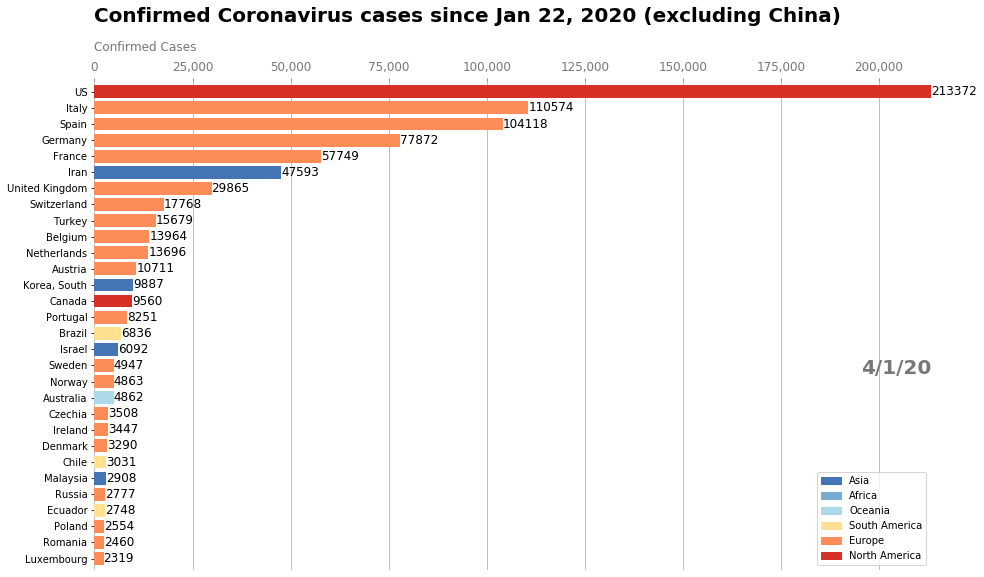

In [36]:
fig, ax = plt.subplots(figsize=(15, 9))
draw_barchart(end)

In [7]:
#Deaths data
death = pd.read_csv(path + files[1] + suffix)#, usecols=[0,1,2,5,6])
death = death.drop(columns=['Lat','Long'])
death.rename(columns = {'Province/State':'state'}, inplace = True) 
death.rename(columns = {'Country/Region':'country'}, inplace = True) 
death.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,14,14,15,15,18,18,21,23,25,30
1,NaN,Albania,0,0,0,0,0,0,0,0,...,22,22,23,23,23,23,23,24,25,26
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,193,205,235,256,275,293,313,326,336,348
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,22,23,25,26,26,29,29,31,33,33
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [11]:
datelabel = '%b %d, %Y'
def draw_stackedbarchart(date,  excludeChina = True):
    #dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    current_date = date.strftime(dateformat)
    #print(current_date)
    
    df = conf.groupby('country', as_index=False).sum().sort_values(by=current_date, ascending = False)[['country',current_date]]
    #.tail(30)
    if excludeChina == True:
        df = df[df['country'] != 'China']
        suffix = '(excluding China)'
    else:
        suffix = ''
        
    df_d = death.groupby('country', as_index=False).sum().sort_values(by=current_date, ascending = False)[['country',current_date]]#.nlargest(20,current_date)

        
    df = df.merge(df_d, how='outer', on=['country'])                 
    df = df.nlargest(25,current_date+'_x')
    df = df[::-1]
    
    margin_left = np.zeros(25) #len(conf['state'].drop_duplicates()))
    
    dx = df[current_date+'_x'].max() / 100
        
    ax.clear()
    ax.barh(df['country'], df[current_date+'_x'], left = margin_left, color=[colors[continent[x]] for x in df['country']])
    
    ax.barh(df['country'], df[current_date+'_y'], left = margin_left, color='k')
    
    for i, (value, value_d, name) in enumerate(zip(df[current_date+'_x'], df[current_date+'_y'], df['country'])):
        if value_d > 0:
            ax.text(value_d+5, i-.1,     int(value_d),           size=9, weight=600, ha='left', va='center')
        #if value > 1000:
        #ax.text(value, i-.25, name, size=12, color='k', ha='right', va='baseline') 
        if value > 0:
            ax.text(value+dx, i,     int(value),  size=12, weight=400, ha='left',  va='center',color='r')
        
    ax.text(1, 0.4, date.strftime(datelabel), transform=ax.transAxes, color='#777777', size=20, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    #ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    
    keys = list(colors.keys())
    
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in keys]
    handles.append(plt.Rectangle((0,0),1,1, color='k'))
    keys.append('Deaths')
    plt.legend(handles, keys, loc='lower right')
    
    #plt.legend(['Europe','Asia','North America'])
    ax.text(0, 1.15, 'Confirmed Coronavirus cases and deaths since Jan 22, 2020 ' + suffix,
            transform=ax.transAxes, size=20, weight=600, ha='left', va='top')
    plt.box(False)

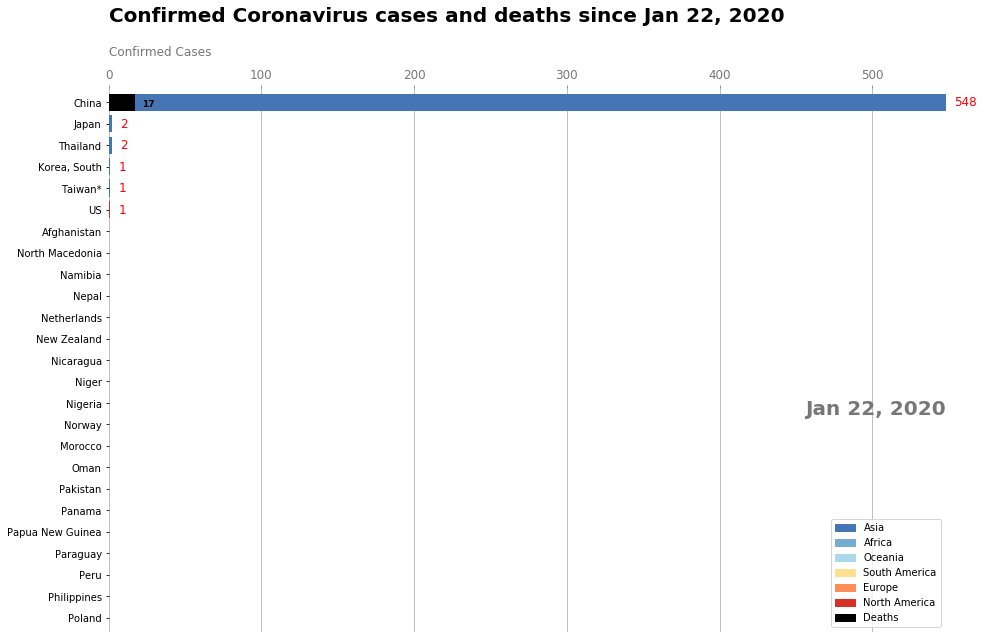

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
draw_stackedbarchart(start, False)

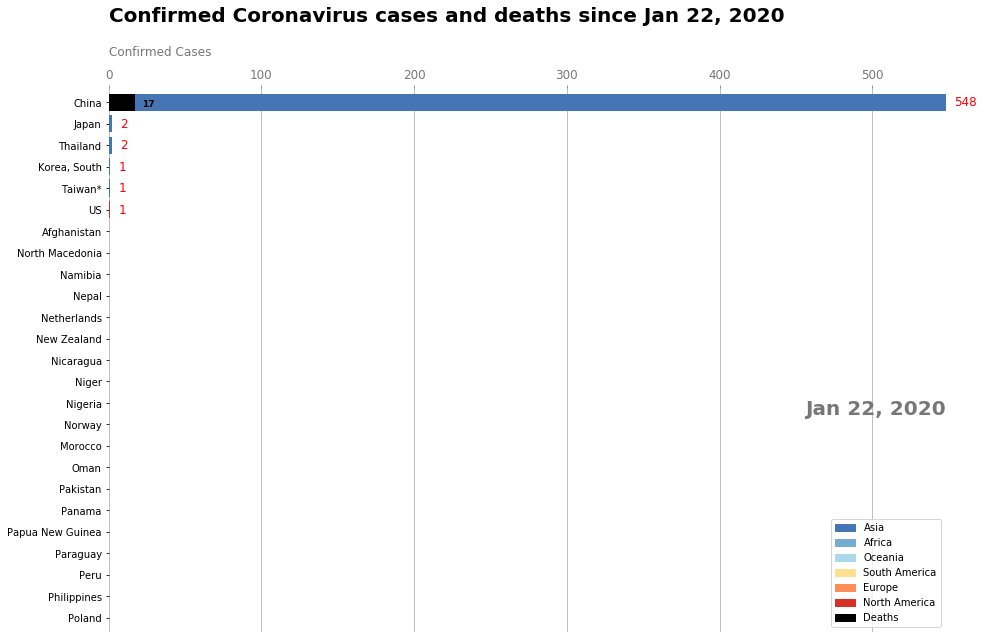

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
#animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start, end), fargs=[death, False])
animator = animation.FuncAnimation(fig, draw_stackedbarchart, frames=pd.date_range(start, end), interval = 400, fargs=[False])
#HTML(animator.to_jshtml())
#HTML(animator.to_html5_video())

animator.save('covid19_confirmed_dead.mp4', writer='ffmpeg')